In [1]:
import os
import glob
import sys

sys.path.insert(0, './segmentation_methods')

from ipynb.fs.full.hough import *
from ipynb.fs.full.hsv import *
from ipynb.fs.full.hough import *
from ipynb.fs.full.otsu import *
from ipynb.fs.full.otsu_and_hough_method1_break import *
from ipynb.fs.full.otsu_and_hough_method2_merge import *
from ipynb.fs.full.watershed import *
from ipynb.fs.full.unet import *

from ipynb.fs.full.benchmark_accurate import read_result_data, print_accs, results_dir
from ipynb.fs.full.general_functions import UNET_VALIDATION, HSV_VALIDATION, NO_VALIDATION
import ipynb.fs.full.methods_names as methods

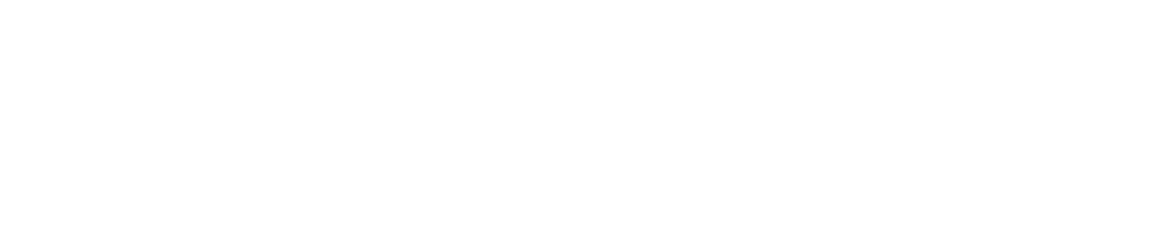

In [2]:
fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(20,4))

col = 0
row = 0

for validation_type in [UNET_VALIDATION, HSV_VALIDATION, NO_VALIDATION]:

    name = "../blood_samples/samples/blood_smear_%d.JPG"
    for i in range(1,31):
        path = name % i
        if os.path.exists(path):
            print("Running:",path, "Validation:",validation_type)
            
            
            
            images, stats = unet_method(path,validation_type,mark_parasites=False)
            
            
            ax[col].set_title("u-net %d Cells %d Internal %d External %s" % stats)
            ax[col].imshow(images[0])

            fig.suptitle(path, fontsize=16)
            col += 1
            if (col == 3):
                col = 0
                plt.show()
                fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(20,4))
            
            

In [3]:
samples = read_result_data(results_dir, method=methods.UNET)

reading ./segmented/oliveira/blood_smear_1.png
reading ./segmented/oliveira/blood_smear_11.png
reading ./segmented/oliveira/blood_smear_12.png
reading ./segmented/oliveira/blood_smear_13.png
reading ./segmented/oliveira/blood_smear_14.png
reading ./segmented/oliveira/blood_smear_15.png
reading ./segmented/oliveira/blood_smear_16.png
reading ./segmented/oliveira/blood_smear_17.png
reading ./segmented/oliveira/blood_smear_18.png
reading ./segmented/oliveira/blood_smear_19.png
reading ./segmented/oliveira/blood_smear_2.png
reading ./segmented/oliveira/blood_smear_20.png
reading ./segmented/oliveira/blood_smear_21.png
reading ./segmented/oliveira/blood_smear_22.png
reading ./segmented/oliveira/blood_smear_23.png
reading ./segmented/oliveira/blood_smear_24.png
reading ./segmented/oliveira/blood_smear_25.png
reading ./segmented/oliveira/blood_smear_26.png
reading ./segmented/oliveira/blood_smear_27.png
reading ./segmented/oliveira/blood_smear_28.png
reading ./segmented/oliveira/blood_smear_2

In [4]:
samples

,sample,method,time,path,validation_type,infection_error,cells_error,true_positive,true_negative,false_positive,false_negative,acc,precision,recall,f1-score
0,./blood_samples/samples/blood_smear_1.jpg,Manual,0.00000,./blood_samples/ground_truth/blood_smear_1.jpg,standalone,-1,-1,-1,-1,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000
1,./blood_samples/samples/blood_smear_1.jpg,U-net,0.48000,./segmented/unet/blood_smear_1_unet.png,unet,1,8,78,0,6,2,0.906977,0.928571,0.975000,0.951220
2,./blood_samples/samples/blood_smear_1.jpg,U-net,0.44000,./segmented/hsv/blood_smear_1_unet.png,hsv,1,8,77,0,5,3,0.905882,0.939024,0.962500,0.950617
3,./blood_samples/samples/blood_smear_1.jpg,U-net,1.15000,./segmented/standalone/blood_smear_1_unet.png,standalone,1,8,78,0,6,2,0.906977,0.928571,0.975000,0.951220
4,./blood_samples/samples/blood_smear_1.jpg,Original,1.30671,./segmented/oliveira/blood_smear_1.png,standalone,1,23,65,0,7,16,0.738636,0.902778,0.802469,0.849673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,./blood_samples/samples/blood_smear_9.jpg,Manual,0.00000,./blood_samples/ground_truth/blood_smear_9.jpg,standalone,-1,-1,-1,-1,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000
141,./blood_samples/samples/blood_smear_9.jpg,U-net,0.48000,./segmented/unet/blood_smear_9_unet.png,unet,0,50,89,0,44,6,0.640288,0.669173,0.936842,0.780702
142,./blood_samples/samples/blood_smear_9.jpg,U-net,0.45000,./segmented/hsv/blood_smear_9_unet.png,hsv,0,53,86,0,44,9,0.618705,0.661538,0.905263,0.764444
143,./blood_samples/samples/blood_smear_9.jpg,U-net,1.72000,./segmented/standalone/blood_smear_9_unet.png,standalone,0,53,89,0,47,6,0.626761,0.654412,0.936842,0.770563


In [5]:
print_accs(samples)

                            acc  precision  recall  f1-score
method   validation_type                                    
Original standalone       0.770      0.868   0.863     0.860
U-net    hsv              0.839      0.917   0.906     0.907
         standalone       0.853      0.915   0.925     0.915
         unet             0.853      0.915   0.925     0.915
